In [4]:
import pandas as pd
import shutil
from os import listdir, mkdir, path
from pathlib import Path
import sys
from email.parser import HeaderParser
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from collections import Counter

In [ ]:
parser = HeaderParser()
columns = ['received1',
'received2',
'received3',
'received4',
'received5',
'received6',
'received7',
'received8',
'received9',
'received10',
'received11',
'received12',
'received13',
'received14',
'received15',
'received16',
'hops',
'subject',
'date',
'message-id',
'from',
'return-path',
'to',
'content-type',
'mime-version',
'x-mailer',
'content-transfer-encoding',
'x-mimeole',
'x-priority',
'list-id',
'lines',
'x-virus-scanned',
'status',
'content-length',
'precedence',
'delivered-to',
'list-unsubscribe',
'list-subscribe',
'list-post',
'list-help',
'x-msmail-priority',
'x-spam-status',
'sender',
'errors-to',
'x-beenthere',
'list-archive',
'reply-to',
'x-mailman-version',
'x-miltered',
'x-uuid',
'x-virus-status',
'x-spam-level',
'x-spam-checker-version',
'references',
'in-reply-to',
'user-agent',
'thread-index',
'cc',
'received-spf',
'x-original-to',
'content-disposition',
'mailing-list',
'x-spam-check-by',
'domainkey-signature',
'importance',
'x-mailing-list',
'label']

list_of_rows = []

def getIndexMap(index_path, data_path):
    index = {}
    with open(index_path, encoding='us-ascii') as index_file:
        for i, line in enumerate(index_file):
            type = line[0:4]
            file_path = line.split('/')[2][:-1]
            if type == 'spam':
                index[f'{data_path}{file_path}'] = 1
            else:
                index[f'{data_path}{file_path}'] = 0
    return index


def addEmailToList(file_path, index):
    global parser, list_of_rows
    
    # The label for the email: ham or spam
    label = index[file_path]
    hops = 0
    emailStr = ""
    row_dict = {}
    
    # Read the full email content
    try:
        with open(file_path, encoding='latin_1') as emailFile:
            for line in emailFile:
                emailStr += line
    except UnicodeDecodeError:
        pass
    
    # Parse the email content
    h = parser.parsestr(emailStr)
    
    # Parse recieved field
    received_list = h.get_all('received')
    hops = 0
    if received_list is not None:
        hops = len(received_list)
        col_name_recieved = 'received'
        
        for inx, received_field in enumerate(received_list):
            col = col_name_recieved + str(inx+1)
            row_dict[col] = received_field

    
    # Make everything lowercase to avoid issues
    features_lower_case = [x.lower() for x in h.keys()]
    
    # Parse everything else
    new_row = dict(zip(features_lower_case, h.values()))
    new_row['hops'] = hops
    
    
    for key,value in new_row.items():
        if key in columns:
            row_dict['label'] = label
            row_dict[key] = value
    
    
    list_of_rows.append(row_dict)

def main():
    global list_of_rows
    index = getIndexMap('trec07p/full/index', 'trec07p/data/')
    start_time = time.time()
    counter = 0
    # Go through each email in the data set
    for emailFile in listdir('trec07p/data'):
        
        # Show progress
        counter += 1
        if (counter % 1000 == 0):
            print(counter)
            print(time.time() - start_time, "seconds")
            start_time = time.time()
        path = 'trec07p/data/' + emailFile
        addEmailToList(path, index)
    
    # Create the dataframe
    df = pd.DataFrame(list_of_rows)
    df = df[columns]
    
    # Output the dataframe to a .csv file
    df.to_csv('extracted_spam_ham.csv', index=False)

if __name__ == '__main__':
    main()

1000
13.240842342376709 seconds


**Show the most common header fields:**

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
('return-path', 75419)
('received', 75419)
('message-id', 75419)
('from', 75419)
('date', 75394)
('subject', 75246)
('to', 74865)
('content-type', 73329)
('mime-version', 68098)
('x-mailer', 41804)
('content-transfer-encoding', 33985)
('x-mimeole', 28593)
('x-priority', 27153)
('lines', 26800)
('status', 26269)
('content-length', 26150)
('x-virus-scanned', 23703)
('precedence', 22158)
('list-unsubscribe', 21745)
('list-subscribe', 21294)
('list-id', 21257)
('list-post', 21244)
('list-help', 21244)
('reply-to', 19408)
('x-msmail-priority', 18629)
('x-spa

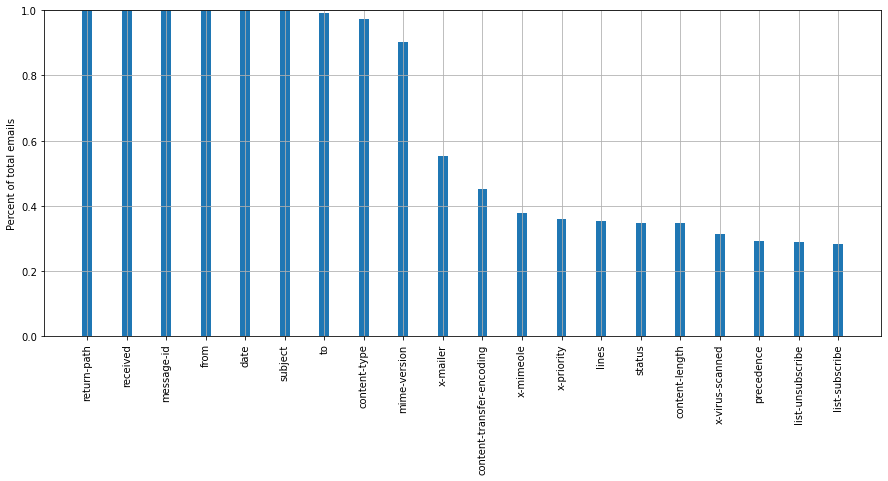

In [7]:
dict_header_features = {}
total_emails = 0

def getIndexMap(index_path, data_path):
    index = {}
    with open(index_path, encoding='us-ascii') as index_file:
        for i, line in enumerate(index_file):
            type = line[0:4]
            file_path = line.split('/')[2][:-1]
            if type == 'spam':
                index[f'{data_path}{file_path}'] = 1
            else:
                index[f'{data_path}{file_path}'] = 0
    return index


def addEmailToDf(file_path, index):
    global dict_header_features, total_emails
    #Dictionary, keys = columns values, values = None initially.
    header = dict.fromkeys(columns)
    
    label = index[file_path]
    
    total_emails += 1
    hops = 0
    host = None
    parser = HeaderParser()
    emailStr = ""
    
    try:
        with open(file_path, encoding='latin1') as emailFile:
            for line in emailFile:
                emailStr += line
    except UnicodeDecodeError:
        pass
    
    h = parser.parsestr(emailStr)
    features_lower_case = [x.lower() for x in h.keys()]
    
    features_dict = Counter(features_lower_case)
    
    for k,v in features_dict.items():
        if k in dict_header_features:
            dict_header_features[k] += 1
        else:
            dict_header_features[k] = 1
    

    
def main():
    global dict_header_features, total_emails
    
    index = getIndexMap('trec07p/full/index', 'trec07p/data/')

    counter = 0
    for emailFile in listdir('trec07p/data'):
        counter += 1
        if counter % 1000 == 0:
            print(counter)
        path = 'trec07p/data/' + emailFile
        addEmailToDf(path, index)
        
    dict_header_features = sorted(dict_header_features.items(), key=lambda x:x[1], reverse=True)

    for v in dict_header_features:
        print(v)
        
    unzipped = list(zip(*dict_header_features))
    lab = unzipped[0]
    val = unzipped[1]
    print("TOTAL EMAIL COUNT:", total_emails)
    val = [x/total_emails for x in val]
    figure(figsize=(15, 6))
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xticks(rotation='vertical')
    plt.ylabel('Percent of total emails')
    plt.bar(lab[0:20], val[0:20], width=0.25)
    plt.grid()
    #plt.savefig('most_common_header_features_latin1.png', bbox_inches="tight")
    plt.show()

if __name__ == '__main__':
    main()